In [1]:
import pandas as pd

#  Remplace 'data.csv' par le chemin de ton fichier
file_path = "x_test_final_fIrnA7Q.csv" 
df = pd.read_csv(file_path,)


#  Afficher les premières lignes du dataset
print("\n🔹 Aperçu des premières lignes :")
print(df.head())

#  Infos générales sur le dataset
print("\n🔹 Infos sur le dataset :")
print(df.info())

#  Statistiques descriptives (uniquement pour les colonnes numériques)
print("\n🔹 Statistiques descriptives :")
print(df.describe())

#  Vérifier les valeurs manquantes
print("\n🔹 Valeurs manquantes :")
print(df.isnull().sum())

#  Afficher les types de colonnes
print("\n🔹 Types des colonnes :")
print(df.dtypes)

#  Afficher les valeurs uniques pour chaque colonne catégorielle
print("\n🔹 Valeurs uniques des colonnes catégorielles :")
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].nunique()} valeurs uniques")

#  Nombre de doublons
print("\n🔹 Nombre de doublons :")
print(df.duplicated().sum())



🔹 Aperçu des premières lignes :
   Unnamed: 0  total_count  longitude_scaled  latitude_scaled  Precipitations  \
0           0            1          0.999023         0.995984             0.4   
1           1           15          0.998640         0.995797             0.0   
2           2            1          0.999010         0.996663             0.0   
3           3            5          0.998883         0.995971             0.0   
4           4            1          0.999136         0.996371             0.0   

   HauteurNeige  Temperature  ForceVent  day_of_week  month_of_year  hour  
0           0.0         15.9        2.3            3              3    12  
1           0.0         25.8        2.9            2              2    17  
2           0.0         15.2        1.7            5              3     7  
3           0.0         32.6        1.6            2              2    11  
4           0.0         24.4        2.3            5              2    10  

🔹 Infos sur le dataset 

🔹 Valeurs manquantes dans x_train :


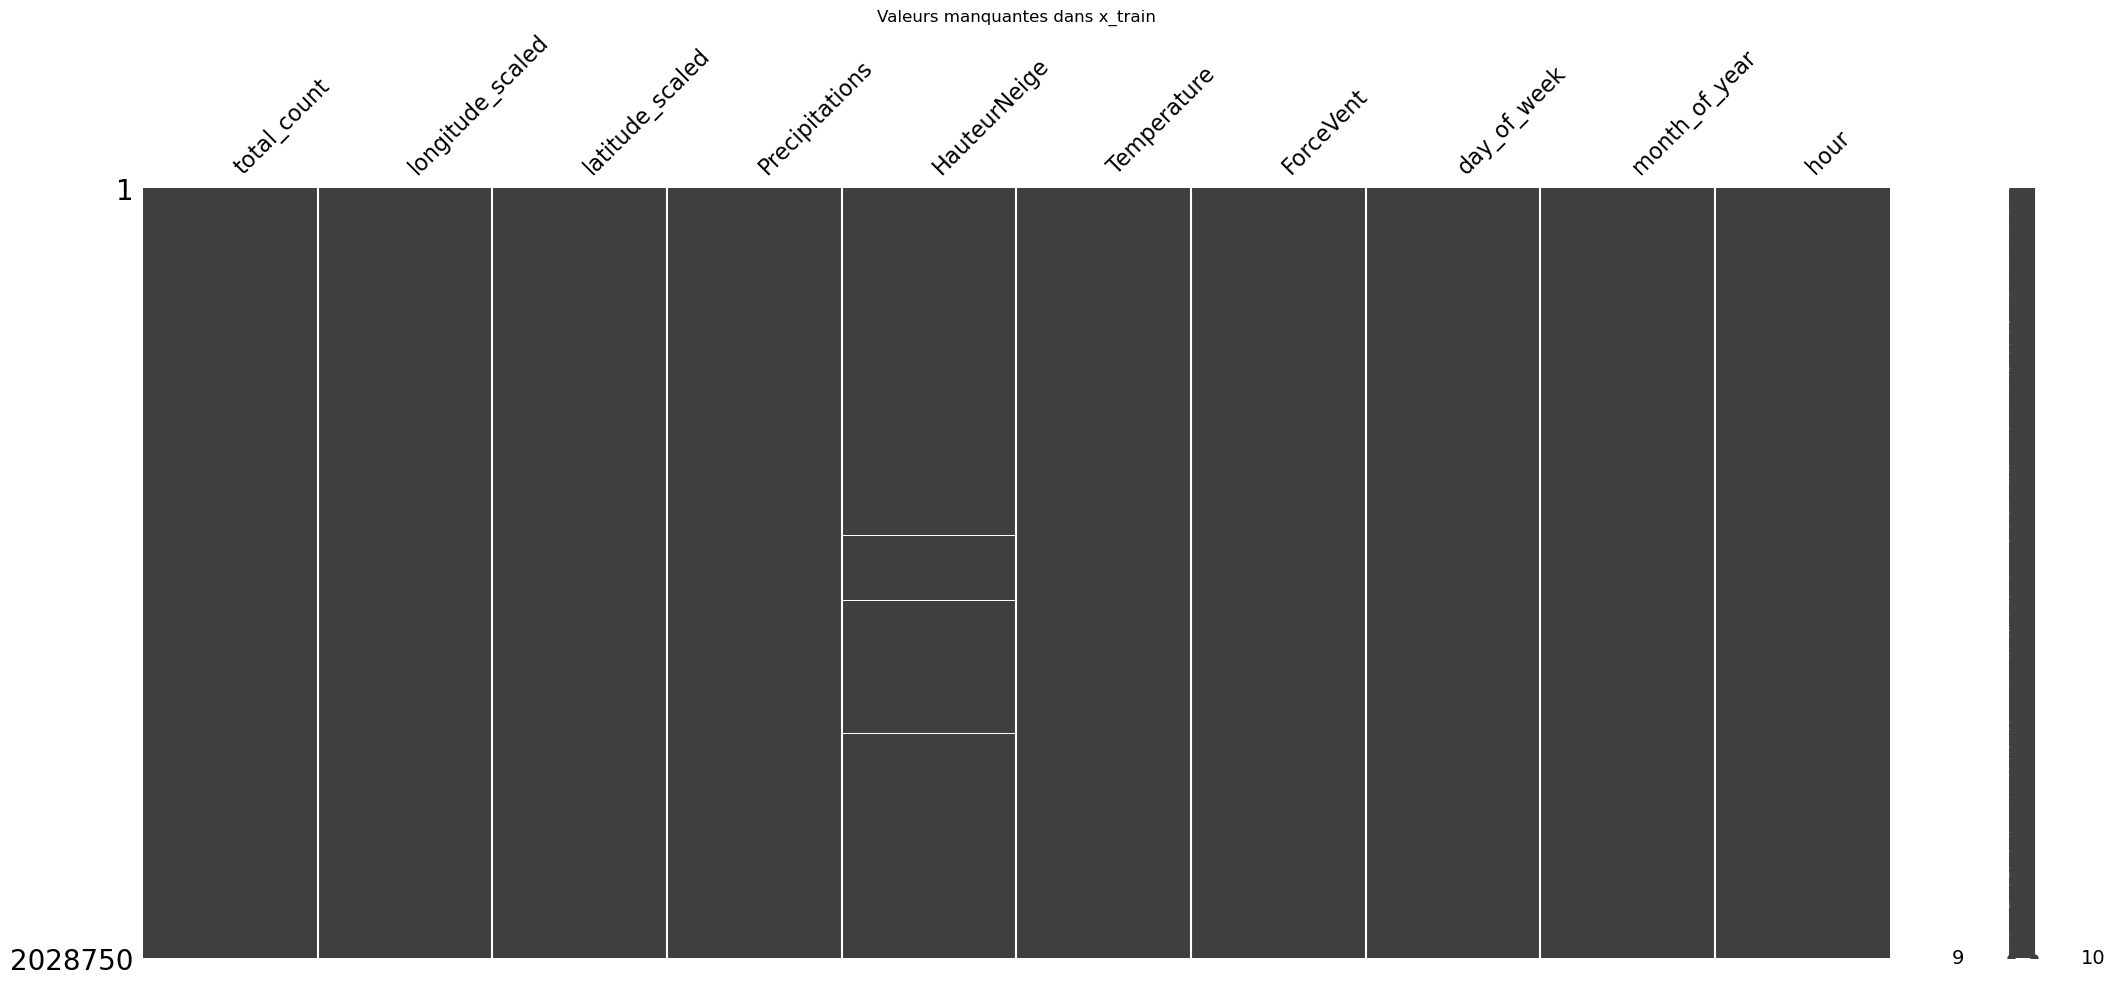

🔹 Distribution des données dans x_train :


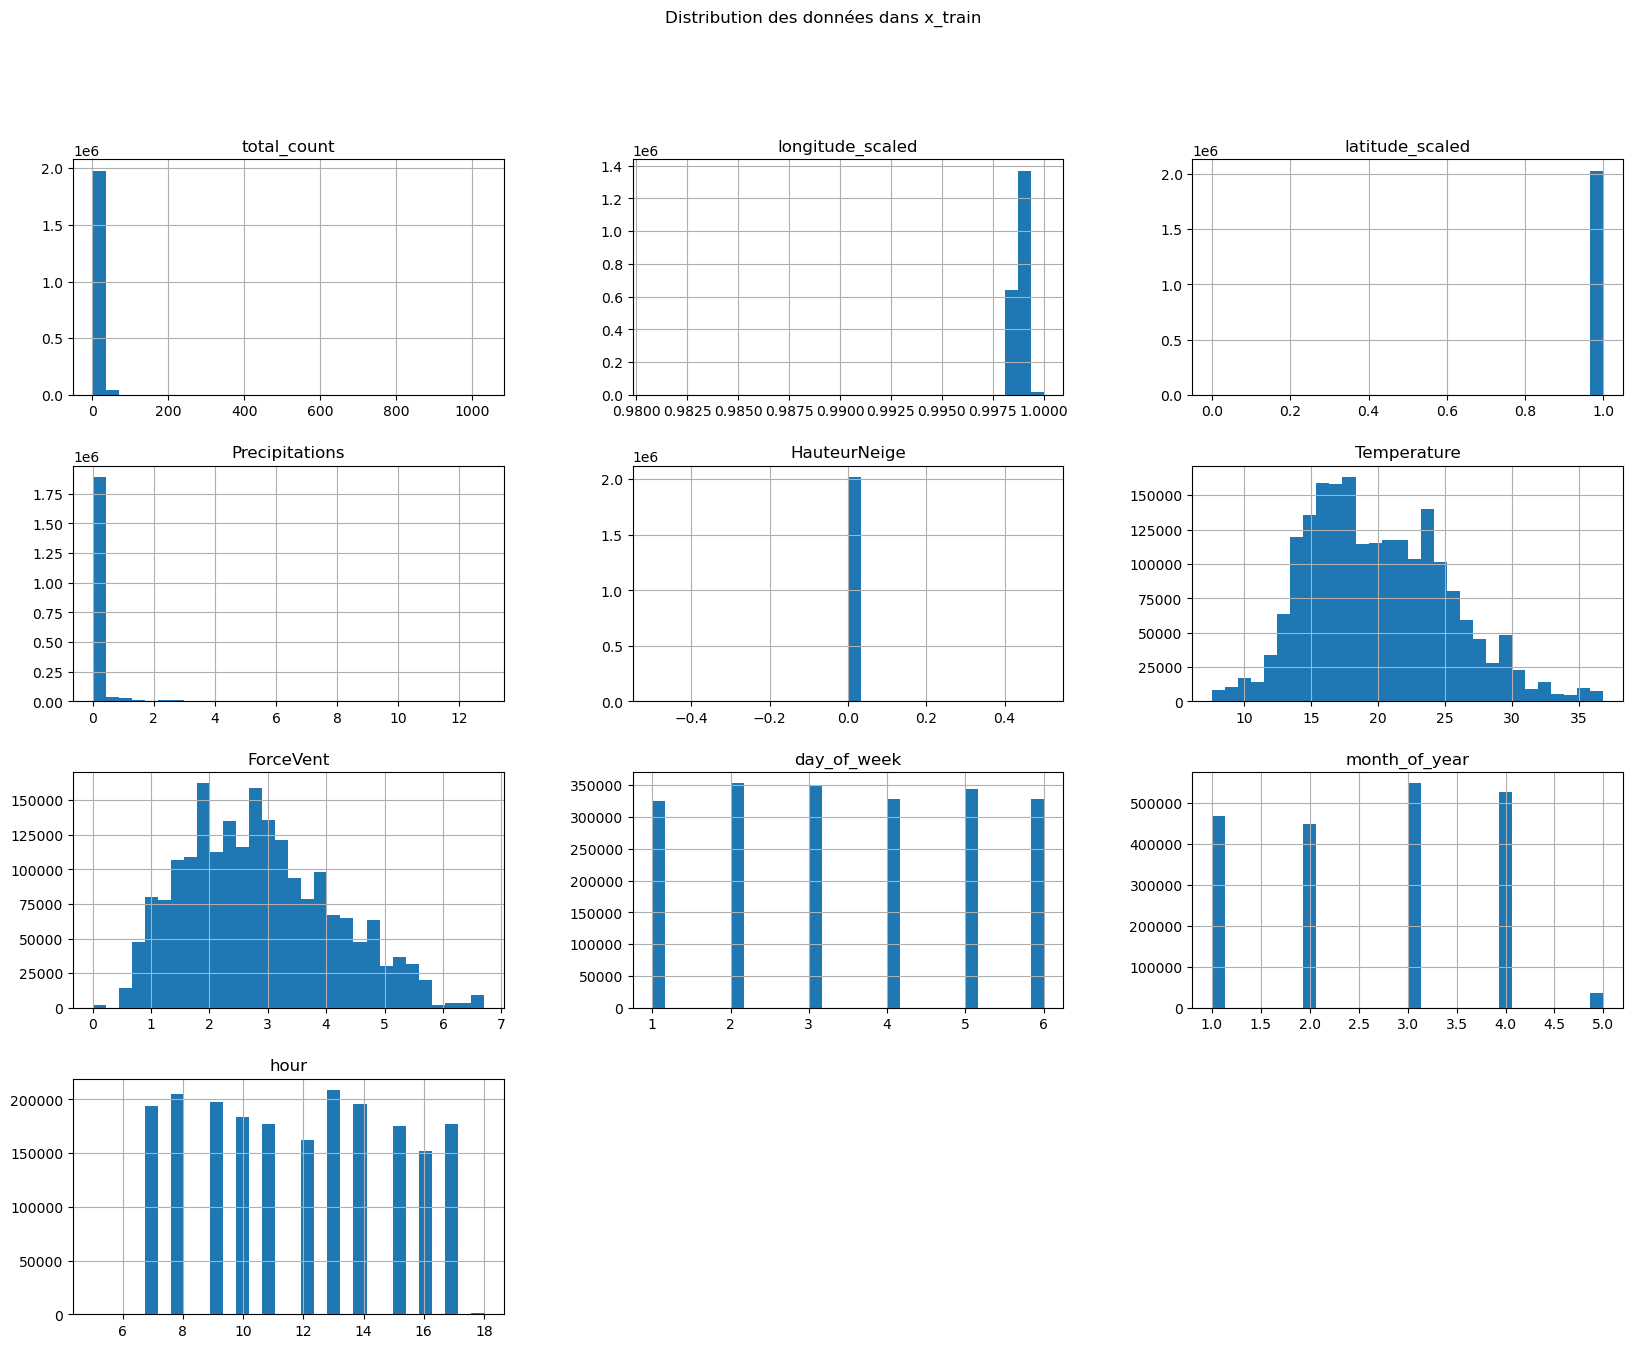

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Lire les fichiers CSV en utilisant la première colonne comme index
x_train_path = "x_test_final_fIrnA7Q.csv"


x_train = pd.read_csv(x_train_path, index_col=0)


# Visualiser les valeurs manquantes avec missingno
def plot_missing_values(df, title):
    msno.matrix(df)
    plt.title(title)
    plt.show()

print("🔹 Valeurs manquantes dans x_train :")
plot_missing_values(x_train, "Valeurs manquantes dans x_train")


# Tracer des histogrammes pour chaque colonne
def plot_histograms(df, title):
    df.hist(bins=30, figsize=(20, 15))
    plt.suptitle(title)
    plt.show()

print("🔹 Distribution des données dans x_train :")
plot_histograms(x_train, "Distribution des données dans x_train")



Nombre de valeurs égales à 0.0 :
total_count               0
longitude_scaled          0
latitude_scaled           0
Precipitations      1823570
HauteurNeige        2020844
Temperature               0
ForceVent              1755
day_of_week               0
month_of_year             0
hour                      0
dtype: int64

Distribution des données (excluant les 0.0) :


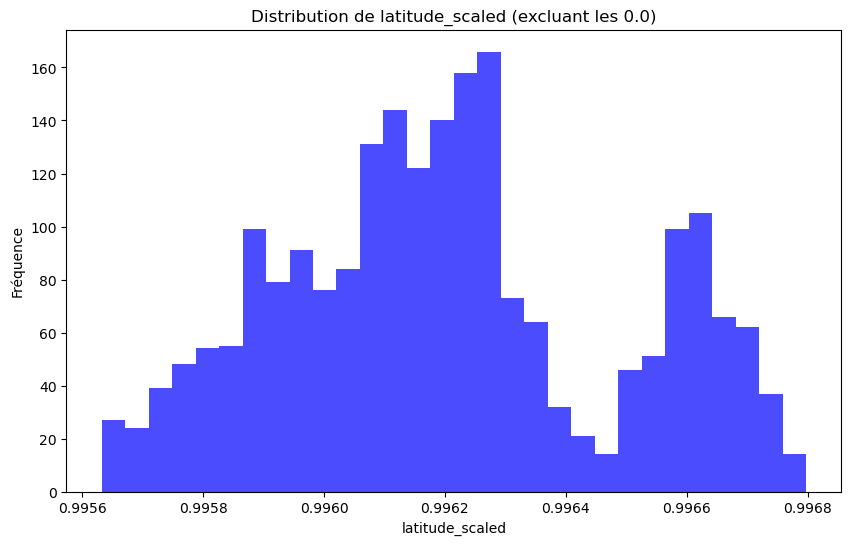

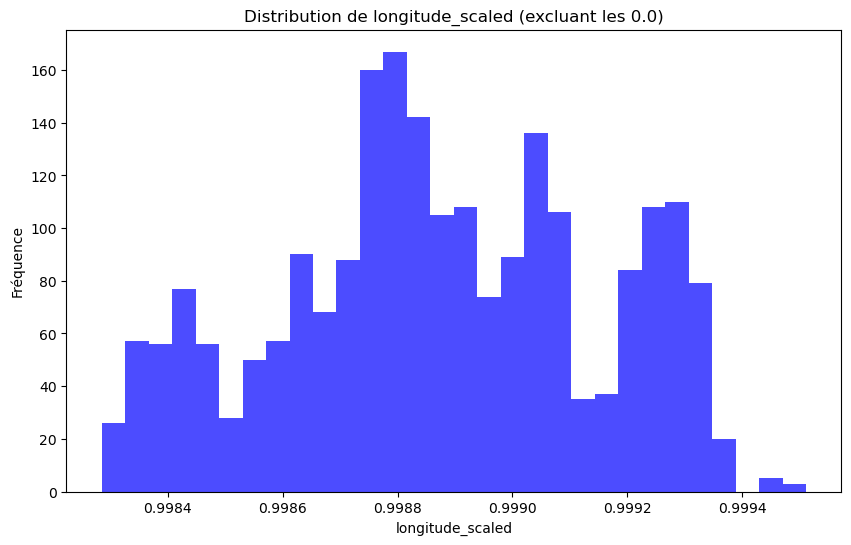

In [3]:
# Compter le nombre de valeurs égales à 0.0
zero_counts = x_train.eq(0.0).sum()

print("Nombre de valeurs égales à 0.0 :")
print(zero_counts)

# Exclure les valeurs égales à 0.0
df_non_zero = x_train[(x_train != 0.0).all(axis=1)]

# Tracer la distribution des données restantes
def plot_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column_name], bins=30, alpha=0.7, color='blue')
    plt.title(f'Distribution de {column_name} (excluant les 0.0)')
    plt.xlabel(column_name)
    plt.ylabel('Fréquence')
    plt.show()

print("\nDistribution des données (excluant les 0.0) :")
plot_distribution(df_non_zero, 'latitude_scaled')
plot_distribution(df_non_zero, 'longitude_scaled')

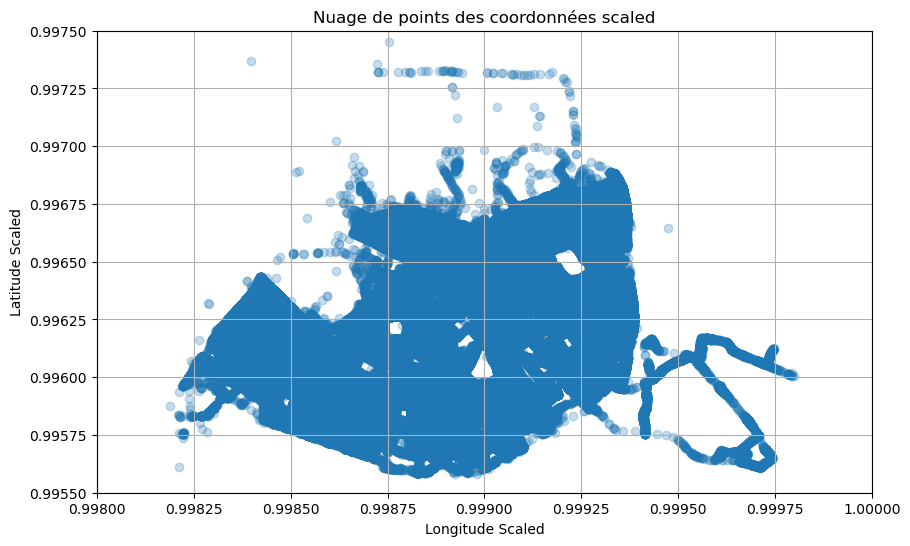

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin vers votre fichier CSV
x_train_path = "x_test_final_fIrnA7Q.csv"

# Lire le fichier CSV en utilisant la première colonne comme index
x_train = pd.read_csv(x_train_path, index_col=0)

# Vérifiez que les colonnes existent dans le DataFrame
if 'longitude_scaled' in x_train.columns and 'latitude_scaled' in x_train.columns:
    # Tracer le nuage de points
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train['longitude_scaled'], x_train['latitude_scaled'], alpha=0.25)
    plt.title('Nuage de points des coordonnées scaled')
    plt.xlabel('Longitude Scaled')
    plt.ylabel('Latitude Scaled')
    # Définir les limites des axes pour zoomer
    plt.xlim(0.998, 1.00)  # Exemple de limites pour l'axe x
    plt.ylim(0.9955, 0.9975)  # Exemple de limites pour l'axe y
    plt.grid(True)
    plt.show()
else:
    print("Les colonnes 'longitude_scaled' et/ou 'latitude_scaled' n'existent pas dans le fichier.")


In [6]:
import pandas as pd
import folium


# Valeurs minimales et maximales réelles pour Paris
lat_min, lat_max = 48.8179, 48.9007
lon_min, lon_max = 2.26755, 2.4644

# Appliquer la transformation inverse
scaled_min_lat, scaled_max_lat = 0.99562, 0.99732
scaled_min_long, scaled_max_long = 0.99824, 0.99976

# Fonction pour inverser le Min-Max scaling
def inverse_min_max_scaling(scaled_value, min_value, max_value):
    return scaled_value * (max_value - min_value) + min_value



x_train['latitude'] = x_train['latitude_scaled'].apply(lambda x: inverse_min_max_scaling((x - scaled_min_lat) / (scaled_max_lat - scaled_min_lat), lat_min, lat_max))
x_train['longitude'] = x_train['longitude_scaled'].apply(lambda x: inverse_min_max_scaling((x - scaled_min_long) / (scaled_max_long - scaled_min_long), lon_min, lon_max))



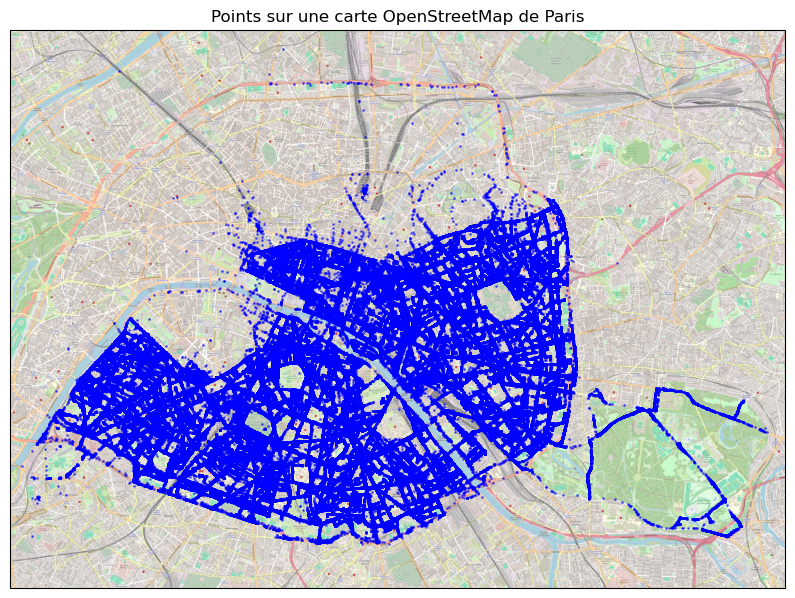

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# Créer une carte avec cartopy et OpenStreetMap
osm_tiles = cimgt.OSM()

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': osm_tiles.crs})
ax.set_extent([lon_min-0.01, lon_max+0.01, lat_min-0.01, lat_max+0.01], crs=ccrs.Geodetic())
ax.add_image(osm_tiles, 15)

# Ajouter les points à la carte
ax.scatter(x_train['longitude'], x_train['latitude'], color='blue', s=1, alpha=0.5, transform=ccrs.Geodetic())

plt.title('Points sur une carte OpenStreetMap de Paris')
plt.show()

In [8]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd


# Charger le fichier GeoJSON
gdf_paris = gpd.read_file('couronne_proche.geojson')
print('Traitement des points')
# Créer un GeoDataFrame à partir de x_train
geometry = [Point(xy) for xy in zip(x_train['longitude'], x_train['latitude'])]
geo_df = gpd.GeoDataFrame(x_train, geometry=geometry)
print('Traitement des zones')
# Déterminer quels points sont dans chaque zone géographique
geo_df['zone'] = None
for idx, zone in gdf_paris.iterrows():
    zone_name = zone.get('nom', {})
    if zone_name:
        mask = geo_df.within(zone['geometry'])
        geo_df.loc[mask, 'zone'] = zone_name
    else: 
        print(f"Feature at index {idx} does not have a 'nom' property.")

# Compter les points dans chaque zone
zone_counts = geo_df['zone'].value_counts()

# Compter les points en dehors de toutes les zones
outside_count = geo_df['zone'].isna().sum()

print("Nombre de points dans chaque zone géographique :")
print(zone_counts)
print("\nNombre de points en dehors de toutes les zones :")
print(outside_count)

# Calculer le total des points
total_points = len(geo_df)

# Calculer les pourcentages
zone_percentages = (zone_counts / total_points) * 100
outside_percentage = (outside_count / total_points) * 100

print("Pourcentage de points dans chaque zone géographique :")
print(zone_percentages)
print("\nPourcentage de points en dehors de toutes les zones :")
print(outside_percentage)


Traitement des points
Traitement des zones
Nombre de points dans chaque zone géographique :
zone
Paris 15e  Arrondissement    438421
Paris 13e  Arrondissement    298726
Paris 14e  Arrondissement    248968
Paris 20e  Arrondissement    229257
Paris 12e  Arrondissement    224622
Paris 11e  Arrondissement    191945
Paris 5e  Arrondissement     132543
Paris 6e  Arrondissement     113243
Paris 3e  Arrondissement      50270
Paris 1er Arrondissement      30178
Paris 4e  Arrondissement      26065
Paris 2e  Arrondissement      23313
Paris 7e  Arrondissement       8099
Paris 19e  Arrondissement      3631
Paris 10e  Arrondissement      3345
Lilas                          1925
Paris 9e  Arrondissement       1527
Saint-Mandé                     573
Saint-Maurice                   393
Paris 8e  Arrondissement        346
Vincennes                       297
Vanves                          186
Ivry-sur-Seine                  175
Issy-les-Moulineaux              92
Joinville-le-Pont                69
Bag

In [9]:
x_train['zone'] = geo_df['zone']

In [10]:
x_train.to_csv("x_test_final_modifie.csv")

In [12]:
import pandas as pd
parkings = pd.read_csv('stationnement-voie-publique-emplacements.csv',sep=";")
parkings[['latitude', 'longitude']] = parkings['geo_point_2d'].str.split(',', expand=True).astype(float)
parkings = parkings[['Régime particulier','Arrondissement','Type de stationnement','Signalisation horizontale','Signalisation verticale','Conformité signalisation','latitude','longitude']]
# Filtrer les parkings pour ne conserver que ceux avec 'Régime particulier' == 'Mixte'
parkings = parkings[parkings['Régime particulier'] == 'Mixte']
# Charger les données principales
x_train = pd.read_csv('x_test_final_modifie.csv', index_col=0)

In [13]:
import pandas as pd
from geopy.distance import geodesic
from tqdm import tqdm
from scipy.spatial import KDTree
from joblib import Parallel, delayed

# Créer un KDTree pour les parkings
parking_coords = parkings[['latitude', 'longitude']].values
parking_tree = KDTree(parking_coords)

# Fonction pour trouver le parking le plus proche
def find_nearest_parking(row, parking_tree, parkings):
    coords = (row['latitude'], row['longitude'])
    _, idx = parking_tree.query(coords)
    nearest_parking = parkings.iloc[idx].copy()  # Utiliser .copy() pour éviter le warning
    nearest_parking.loc['distance'] = geodesic(coords, (nearest_parking['latitude'], nearest_parking['longitude'])).km
    return nearest_parking

# Fonction pour ajouter les caractéristiques du parking le plus proche
def add_parking_features(df, parking_tree, parkings, output_file):
    # Écrire l'en-tête du fichier CSV
    header = True
    for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="Traitement des lignes"):
        nearest_parking = find_nearest_parking(row, parking_tree, parkings)
        parking_features = nearest_parking[['distance', 'Régime particulier', 'Type de stationnement', 'Signalisation horizontale', 'Signalisation verticale', 'Conformité signalisation']]
        combined_row = pd.concat([row, parking_features], axis=0)
        combined_row.to_frame().T.to_csv(output_file, mode='a', header=header, index=False)
        header = False  # Ne pas réécrire l'en-tête après la première ligne

# Ajouter les caractéristiques des parkings à x_train et écrire dans le fichier en continu
output_file = 'x_test_consolidated.csv'
add_parking_features(x_train, parking_tree, parkings, output_file)

print("Dataset consolidé avec succès et sauvegardé sous 'x_test_consolidated.csv'.")


Traitement des lignes: 100%|██████████| 2028750/2028750 [52:28<00:00, 644.26it/s] 


Dataset consolidé avec succès et sauvegardé sous 'x_test_consolidated.csv'.


### Test

In [10]:
import pandas as pd

#  Remplace 'data.csv' par le chemin de ton fichier
#x_train = pd.read_csv('x_test_consolidated.csv')
df = x_train
#  Afficher les premières lignes du dataset
print("\n🔹 Aperçu des premières lignes :")
print(df.head())

#  Infos générales sur le dataset
print("\n🔹 Infos sur le dataset :")
print(df.info())

#  Statistiques descriptives (uniquement pour les colonnes numériques)
print("\n🔹 Statistiques descriptives :")
print(df.describe())

#  Vérifier les valeurs manquantes
print("\n🔹 Valeurs manquantes :")
print(df.isnull().sum())

#  Afficher les types de colonnes
print("\n🔹 Types des colonnes :")
print(df.dtypes)

#  Afficher les valeurs uniques pour chaque colonne catégorielle
print("\n🔹 Valeurs uniques des colonnes catégorielles :")
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].nunique()} valeurs uniques")

#  Nombre de doublons
print("\n🔹 Nombre de doublons :")
print(df.duplicated().sum())


🔹 Aperçu des premières lignes :
   total_count  Precipitations  HauteurNeige  Temperature  ForceVent  \
0            1             0.0           0.0         14.6        2.5   
1           35             0.0           0.0         22.4        3.1   
2            3             1.8           0.0         11.7        3.3   
3            1             0.0           0.0         28.6        2.6   
4            2             0.0           0.0          9.6        3.2   

    latitude  longitude                       zone  Arrondissement  \
0  48.842168   2.290506  Paris 15e  Arrondissement            15.0   
1  48.836405   2.394674  Paris 12e  Arrondissement            12.0   
2  48.851437   2.284477  Paris 15e  Arrondissement            15.0   
3  48.853134   2.340650   Paris 6e  Arrondissement             6.0   
4  48.856721   2.382306  Paris 11e  Arrondissement            11.0   

  Type de stationnement Signalisation horizontale Signalisation verticale  \
0          Longitudinal             

In [20]:
# Gestion des valeurs manquantes spécifiques
x_train['HauteurNeige'].fillna(0.0, inplace=True)
x_train['ForceVent'].fillna(0.0, inplace=True)

C:\Users\tommy\AppData\Local\Temp\ipykernel_27240\489462035.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['HauteurNeige'].fillna(0.0, inplace=True)
C:\Users\tommy\AppData\Local\Temp\ipykernel_27240\489462035.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [21]:
from sklearn.preprocessing import LabelEncoder

for column in x_train.select_dtypes(include=['object']).columns:
    x_train[column].fillna('missing', inplace=True)

# Encodage des variables catégoriques
label_encoders = {}
for column in x_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_train[column] = le.fit_transform(x_train[column])
    label_encoders[column] = %less

C:\Users\tommy\AppData\Local\Temp\ipykernel_27240\1193668777.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train[column].fillna('missing', inplace=True)
UsageError: Missing filename.


In [23]:
x_train = x_train.drop(columns=['latitude_scaled','longitude_scaled','distance','Régime particulier'])

In [39]:
x_train

,total_count,longitude_scaled,latitude_scaled,Precipitations,HauteurNeige,Temperature,ForceVent,latitude,longitude,zone,...,Type de stationnement,Signalisation horizontale,Signalisation verticale,Conformité signalisation,day_of_week_sin,day_of_week_cos,month_of_year_sin,month_of_year_cos,hour_sin,hour_cos
0,1,0.998417,0.996118,0.0,0.0,14.6,2.5,48.842168,2.290506,Paris 15e Arrondissement,...,Longitudinal,Présente,Absente,Conforme,0.433884,-0.900969,8.660254e-01,-5.000000e-01,8.660254e-01,-5.000000e-01
1,35,0.999222,0.996000,0.0,0.0,22.4,3.1,48.836405,2.394674,Paris 12e Arrondissement,...,Longitudinal,Présente,Absente,Conforme,-0.974928,-0.222521,1.000000e+00,6.123234e-17,-2.588190e-01,-9.659258e-01
2,3,0.998371,0.996309,1.8,0.0,11.7,3.3,48.851437,2.284477,Paris 15e Arrondissement,...,Longitudinal,Présente,Absente,Conforme,-0.433884,-0.900969,-8.660254e-01,5.000000e-01,8.660254e-01,-5.000000e-01
3,1,0.998804,0.996343,0.0,0.0,28.6,2.6,48.853134,2.340650,Paris 6e Arrondissement,...,Longitudinal,Abimé,Absente,SH Non-conforme,-0.433884,-0.900969,8.660254e-01,5.000000e-01,-8.660254e-01,-5.000000e-01
4,2,0.999126,0.996417,0.0,0.0,9.6,3.2,48.856721,2.382306,Paris 11e Arrondissement,...,Longitudinal,Présente,Absente,Conforme,0.433884,-0.900969,-1.000000e+00,-1.836970e-16,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076541,9,0.998397,0.996100,0.0,0.0,-0.3,2.3,48.841264,2.287908,Paris 15e Arrondissement,...,Longitudinal,Présente,Absente,Conforme,-0.974928,-0.222521,-5.000000e-01,-8.660254e-01,-1.000000e+00,-1.836970e-16
6076542,55,0.998655,0.996093,0.0,0.0,17.0,6.0,48.840957,2.321334,Paris 15e Arrondissement,...,Longitudinal,Présente,Absente,Conforme,-0.781831,0.623490,-2.449294e-16,1.000000e+00,5.000000e-01,-8.660254e-01
6076543,9,0.999200,0.996001,0.0,0.0,11.5,5.1,48.836457,2.391812,Paris 12e Arrondissement,...,Longitudinal,Présente,Absente,Conforme,0.433884,-0.900969,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00
6076544,14,0.998374,0.996076,0.0,0.0,13.6,3.5,48.840115,2.284930,Paris 15e Arrondissement,...,Longitudinal,Abimé,Absente,SH Non-conforme,-0.433884,-0.900969,-5.000000e-01,8.660254e-01,9.659258e-01,-2.588190e-01


In [44]:
x_train.columns

Index(['total_count', 'longitude_scaled', 'latitude_scaled', 'Precipitations',
       'HauteurNeige', 'Temperature', 'ForceVent', 'latitude', 'longitude',
       'zone', 'Arrondissement', 'distance', 'Régime particulier',
       'Type de stationnement', 'Signalisation horizontale',
       'Signalisation verticale', 'Conformité signalisation',
       'day_of_week_sin', 'day_of_week_cos', 'month_of_year_sin',
       'month_of_year_cos', 'hour_sin', 'hour_cos'],
      dtype='object')

### Recherche de modèle

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [1]:
# Charger les fichiers CSV
import numpy as np
import pandas as pd
x_test = pd.read_csv('x_test_consolidated.csv')
x_train = pd.read_csv('x_train_consolidated.csv')
y_train = pd.read_csv('y_train_final_YYyFil7.csv',index_col=0)

In [2]:
x_train = x_train.drop(columns=['latitude_scaled','longitude_scaled','distance','Régime particulier','Arrondissement'])
x_test = x_test.drop(columns=['latitude_scaled','longitude_scaled','distance','Régime particulier'])

In [3]:
# Gestion des valeurs manquantes spécifiques
x_train['HauteurNeige'].fillna(0.0, inplace=True)
x_train['ForceVent'].fillna(0.0, inplace=True)

x_test['HauteurNeige'].fillna(0.0, inplace=True)
x_test['ForceVent'].fillna(0.0, inplace=True)

for column in x_train.select_dtypes(include=['object']).columns:
    x_train.fillna({column: 'missing'}, inplace=True)
for column in x_test.select_dtypes(include=['object']).columns:
    x_test.fillna({column: 'missing'}, inplace=True)

C:\Users\tommy\AppData\Local\Temp\ipykernel_19392\3719526427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['HauteurNeige'].fillna(0.0, inplace=True)
C:\Users\tommy\AppData\Local\Temp\ipykernel_19392\3719526427.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [4]:
# Encodage des caractéristiques cycliques
def encode_cyclic_feature(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / max_val)
    return df

x_train = encode_cyclic_feature(x_train, 'day_of_week', 7)
x_train = encode_cyclic_feature(x_train, 'month_of_year', 12)
x_train = encode_cyclic_feature(x_train, 'hour', 24)

x_test = encode_cyclic_feature(x_test, 'day_of_week', 7)
x_test = encode_cyclic_feature(x_test, 'month_of_year', 12)
x_test = encode_cyclic_feature(x_test, 'hour', 24)


In [5]:
# Suppression des colonnes originales après encodage
x_train.drop(columns=['day_of_week', 'month_of_year', 'hour'], inplace=True)
x_test.drop(columns=['day_of_week', 'month_of_year', 'hour'], inplace=True)

In [6]:
x_train.columns

Index(['total_count', 'Precipitations', 'HauteurNeige', 'Temperature',
       'ForceVent', 'latitude', 'longitude', 'zone', 'Type de stationnement',
       'Signalisation horizontale', 'Signalisation verticale',
       'Conformité signalisation', 'day_of_week_sin', 'day_of_week_cos',
       'month_of_year_sin', 'month_of_year_cos', 'hour_sin', 'hour_cos'],
      dtype='object')

In [7]:
x_test.columns

Index(['total_count', 'Precipitations', 'HauteurNeige', 'Temperature',
       'ForceVent', 'latitude', 'longitude', 'zone', 'Type de stationnement',
       'Signalisation horizontale', 'Signalisation verticale',
       'Conformité signalisation', 'day_of_week_sin', 'day_of_week_cos',
       'month_of_year_sin', 'month_of_year_cos', 'hour_sin', 'hour_cos'],
      dtype='object')

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Séparation des caractéristiques et de la cible
X = x_train
y = y_train.values.ravel()  # Assurez-vous que y est un vecteur 1D

# Identification des colonnes catégorielles
categorical_features = ['zone', 'Type de stationnement', 'Signalisation horizontale', 'Signalisation verticale', 'Conformité signalisation']

# Application du One-Hot Encoding
onehotencoder = OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore')

# Création d'un ColumnTransformer pour appliquer les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', x_train.columns.difference(categorical_features)),
        ('cat', onehotencoder, categorical_features)
    ])

# Création d'un pipeline avec le préprocesseur et le modèle de régression linéaire
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Évaluation du modèle avec validation croisée
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Affichage des scores de validation croisée
print("Scores de validation croisée :", cv_scores)
print("Score moyen de validation croisée :", cv_scores.mean())

c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Scores de validation croisée : [-0.12367036 -0.12361187 -0.12345554 -0.12343418 -0.12361377]
Score moyen de validation croisée : -0.12355714252978123


In [10]:
import numpy as np
import time
import joblib
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV, train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings

warnings.filterwarnings("ignore", message="Found unknown categories")

# Chargement des données
X = x_train
y = y_train.values.ravel()

# Identification des colonnes catégorielles
categorical_features = ['zone', 'Type de stationnement', 'Signalisation horizontale', 'Signalisation verticale', 'Conformité signalisation']

# Preprocessing
onehotencoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns.difference(categorical_features)),
        ('cat', onehotencoder, categorical_features)
    ])

# Modèles
models = {
    #"LinearRegression": LinearRegression(),
    #"Lasso": Lasso(),
    #"Ridge": Ridge(),
    #"ElasticNet": ElasticNet(),
    #"SVR": SVR(),
    #"RandomForest": RandomForestRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    #"Bagging": BaggingRegressor(),
    #"MLPRegressor": MLPRegressor(),
    #"DecisionTree": DecisionTreeRegressor()
}

# Hyperparamètres
param_distributions = {
    "LinearRegression": {},
    "Lasso": {"regressor__alpha": [0.001, 0.01, 0.1, 1, 10, 100]},
    "Ridge": {"regressor__alpha": [0.001, 0.01, 0.1, 1, 10, 100]},
    "ElasticNet": {"regressor__alpha": [0.001, 0.01, 0.1, 1, 10], "regressor__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]},
    "SVR": {"regressor__C": [0.01, 0.1, 1, 10, 100], "regressor__gamma": ['scale', 'auto']},
    "RandomForest": {"regressor__n_estimators": [50, 100, 200, 500], "regressor__max_depth": [5, 10, 20, 50]},
    "HistGradientBoosting": {"regressor__max_iter": [100, 200, 500,1000], "regressor__learning_rate": [0.01,0.05, 0.1, 0.2,0.5]},
    "Bagging": {"regressor__n_estimators": [10, 50, 100, 200]},
    "MLPRegressor": {"regressor__hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 100)], "regressor__alpha": [0.0001, 0.001, 0.01]},
    "DecisionTree": {"regressor__max_depth": [5, 10, 20, 50], "regressor__min_samples_split": [2, 5, 10]}
}

# Réduction de l'échantillon pour SVR
X_svr, _, y_svr, _ = train_test_split(X, y, train_size=0.1, random_state=42)

# Validation croisée et entraînement
results = {}
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"Entraînement du modèle {model_name}...")
    start_time = time.time()
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    param_grid = param_distributions.get(model_name, {})
    search = HalvingRandomSearchCV(pipeline, param_grid, factor=3, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1,min_resources=1000000)
    
    if model_name == "SVR":
        search.fit(X_svr, y_svr)
    else:
        search.fit(X, y)
    end_time = time.time()
    training_time = end_time - start_time
    print(f"Modèle {model_name} entraîné en {training_time:.2f} secondes.")
    
    best_model = search.best_estimator_
    joblib.dump(best_model, f'best_{model_name}.pkl')
    
    y_pred = search.best_estimator_.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    results[model_name] = {'RMSE': rmse}
    print(f"{model_name}: RMSE = {rmse:.4f}")


Entraînement du modèle HistGradientBoosting...
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1000000
max_resources_: 6076546
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 6
n_resources: 1000000
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 1
n_candidates: 2
n_resources: 3000000
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Modèle HistGradientBoosting entraîné en 2544.62 secondes.
HistGradientBoosting: RMSE = 0.2889


Entraînement Bagging

In [14]:
import numpy as np
import time
import joblib
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV, train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
import warnings

warnings.filterwarnings("ignore", message="Found unknown categories")

# Chargement des données
X = x_train
y = y_train.values.ravel()

# Identification des colonnes catégorielles
categorical_features = ['zone', 'Type de stationnement', 'Signalisation horizontale', 'Signalisation verticale', 'Conformité signalisation']

# Preprocessing
onehotencoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns.difference(categorical_features)),
        ('cat', onehotencoder, categorical_features)
    ])

# Modèles
models = {
    "Baggingv2": BaggingRegressor(),
}

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Hyperparamètres avec des distributions plus larges
param_distributions = {
    "Baggingv2": {
        "regressor__n_estimators": [10, 50, 100, 200, 500],
        "regressor__max_samples": uniform(0.1,0.3),
    },
}

# Validation croisée et entraînement
results = {}
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"Entraînement du modèle {model_name}...")
    start_time = time.time()
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    param_grid = param_distributions.get(model_name, {})
    search = HalvingRandomSearchCV(pipeline, param_grid, n_candidates=81, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, min_resources=75000)

    search.fit(X, y)
    end_time = time.time()
    training_time = end_time - start_time
    print(f"Modèle {model_name} entraîné en {training_time:.2f} secondes.")

    best_model = search.best_estimator_
    joblib.dump(best_model, f'best_{model_name}.pkl')

    y_pred = search.best_estimator_.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    results[model_name] = {'RMSE': rmse}
    print(f"{model_name}: RMSE = {rmse:.4f}")


Entraînement du modèle Baggingv2...
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 75000
max_resources_: 6076546
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 81
n_resources: 75000
Fitting 3 folds for each of 81 candidates, totalling 243 fits
----------
iter: 1
n_candidates: 27
n_resources: 225000
Fitting 3 folds for each of 27 candidates, totalling 81 fits
----------
iter: 2
n_candidates: 9
n_resources: 675000
Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
18 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(

----------
iter: 3
n_candidates: 3
n_resources: 2025000
Fitting 3 folds for each of 3 candidates, totalling 9 fits


c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt

----------
iter: 4
n_candidates: 1
n_resources: 6075000
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tommy\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt

Modèle Baggingv2 entraîné en 33793.54 secondes.


OSError: [Errno 28] No space left on device

Entraînement du HistGradientBoosting

In [12]:
import numpy as np
import time
import joblib
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV, train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor
import warnings

warnings.filterwarnings("ignore", message="Found unknown categories")

# Chargement des données
X = x_train
y = y_train.values.ravel()

# Identification des colonnes catégorielles
categorical_features = ['zone', 'Type de stationnement', 'Signalisation horizontale', 'Signalisation verticale', 'Conformité signalisation']

# Preprocessing
onehotencoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns.difference(categorical_features)),
        ('cat', onehotencoder, categorical_features)
    ])

# Modèles
models = {
    "HistGradientBoostingv3": HistGradientBoostingRegressor(),
}

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

# Hyperparamètres avec des distributions plus larges
param_distributions = {
    "HistGradientBoostingv3": {
        "regressor__max_iter": [1000,2000,5000,10000],
        "regressor__learning_rate": uniform(0.1, 0.2),
        "regressor__min_samples_leaf": [100,500,1000,5000,10000],
        "regressor__l2_regularization": uniform(0, 1)
    },
}

# Validation croisée et entraînement
results = {}
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"Entraînement du modèle {model_name}...")
    start_time = time.time()
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    param_grid = param_distributions.get(model_name, {})
    search = HalvingRandomSearchCV(pipeline, param_grid, n_candidates=81, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2,min_resources=75000)

    search.fit(X, y)
    end_time = time.time()
    training_time = end_time - start_time
    print(f"Modèle {model_name} entraîné en {training_time:.2f} secondes.")

    best_model = search.best_estimator_
    joblib.dump(best_model, f'best_{model_name}.pkl')

    y_pred = search.best_estimator_.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    results[model_name] = {'RMSE': rmse}
    print(f"{model_name}: RMSE = {rmse:.4f}")


Entraînement du modèle HistGradientBoostingv3...
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 75000
max_resources_: 6076546
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 81
n_resources: 75000
Fitting 3 folds for each of 81 candidates, totalling 243 fits
----------
iter: 1
n_candidates: 27
n_resources: 225000
Fitting 3 folds for each of 27 candidates, totalling 81 fits
----------
iter: 2
n_candidates: 9
n_resources: 675000
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 3
n_candidates: 3
n_resources: 2025000
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 4
n_candidates: 1
n_resources: 6075000
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Modèle HistGradientBoostingv3 entraîné en 4735.85 secondes.
HistGradientBoostingv3: RMSE = 0.2864


Entraînement catboost

In [10]:
import numpy as np
import joblib
from sklearn.calibration import cross_val_predict
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import KFold, train_test_split, HalvingGridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import warnings

# Ignorer les avertissements spécifiques concernant les catégories inconnues
warnings.filterwarnings("ignore", message="Found unknown categories")

# Séparation des caractéristiques et de la cible
X = x_train
y = y_train.values.ravel()  # Assurez-vous que y est un vecteur 1D

# Identification des colonnes catégorielles
categorical_features = ['zone', 'Type de stationnement', 'Signalisation horizontale', 'Signalisation verticale', 'Conformité signalisation']

# Application du One-Hot Encoding avec gestion des catégories inconnues
onehotencoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Création d'un ColumnTransformer pour appliquer les transforma            tions
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X.columns.difference(categorical_features)),
        ('cat', onehotencoder, categorical_features)
    ])

# Initialisation des modèles
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
lgb_model = lgb.LGBMRegressor()
cat_model = CatBoostRegressor(cat_features=categorical_features,verbose=0)

# Grilles de paramètres pour chaque modèle
param_grid_xgb = {
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.1, 0.01, 0.001],
    'regressor__subsample': [0.5, 0.7, 1]
}

param_grid_lgb = {
    'regressor__num_leaves': [10, 55, 100],
    'regressor__learning_rate': [0.01, 0.155, 0.3],
    'regressor__n_estimators': [10, 505, 1000],
    'regressor__max_depth': [5, 10, 15],
    'regressor__min_child_samples': [5, 52, 100],
    'regressor__bagging_fraction': [0.5, 0.75, 1],
    'regressor__feature_fraction': [0.5, 0.75, 1]
}

param_grid_cat = {
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.1, 0.01, 0.001],
    'regressor__iterations': [50, 500, 1000]
}

# Halving Grid Search pour XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

xgb_search = HalvingGridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid_xgb,
    scoring='neg_mean_squared_error',
    cv=5,
    factor=3,
    verbose=1
)
#xgb_search.fit(X, y)
#best_xgb = xgb_search.best_estimator_
#joblib.dump(best_xgb, 'best_xgb_model.pkl')
print("Les modèles ont été enregistrés avec succès.")
# Halving Grid Search pour LightGBM
lgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lgb_model)
])

lgb_search = HalvingGridSearchCV(
    estimator=lgb_pipeline,
    param_grid=param_grid_lgb,
    scoring='neg_mean_squared_error',
    cv=5,
    factor=3,
    verbose=1
)
#lgb_search.fit(X, y)
#best_lgb = lgb_search.best_estimator_
#joblib.dump(best_lgb, 'best_lgb_model.pkl')
print("Les modèles ont été enregistrés avec succès.")
# Halving Grid Search pour CatBoost
cat_pipeline = Pipeline(steps=[
    ('regressor', cat_model)
])

cat_search = HalvingGridSearchCV(
    estimator=cat_pipeline,
    param_grid=param_grid_cat,
    scoring='neg_mean_squared_error',
    cv=5,
    factor=3,
    verbose=1
)
cat_search.fit(X, y)
best_cat = cat_search.best_estimator_
joblib.dump(best_cat, 'best_cat_model.pkl')
print("Les modèles ont été enregistrés avec succès.")
# Évaluation des modèles avec validation croisée
models = {#'XGBoost': best_xgb, 'LightGBM': best_lgb, 
    'CatBoost': best_cat}
results = {}

kf = KFold(n_splits=3, shuffle=True, random_state=42)

for model_name, model in models.items():
    # Prédictions croisées
    y_pred = cross_val_predict(model, X, y, cv=kf)

    # Calcul du RMSE moyen
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Calcul de la corrélation de Spearman
    spearman_corr, _ = spearmanr(y, y_pred)

    results[model_name] = {'RMSE': rmse, 'Spearman Correlation': spearman_corr}

# Affichage des résultats
for model_name, metrics in results.items():
    print(f"{model_name}: RMSE = {metrics['RMSE']:.4f}, Spearman Correlation = {metrics['Spearman Correlation']:.4f}")




Les modèles ont été enregistrés avec succès.
Les modèles ont été enregistrés avec succès.
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 225057
max_resources_: 6076546
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 27
n_resources: 225057
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 9
n_resources: 675171
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 3
n_resources: 2025513
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 1
n_resources: 6076539
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Les modèles ont été enregistrés avec succès.
CatBoost: RMSE = 0.3089, Spearman Correlation = 0.5196


In [9]:
import joblib
model = joblib.load('best_Baggingv2.pkl')
# Prédiction sur l'ensemble de test
y_pred = model.predict(x_test)

# Sauvegarde des prédictions dans un fichier CSV
y_test_pred = pd.DataFrame(y_pred, columns=['Prediction'])
y_test_pred.to_csv('y_test_Baggingv2.csv', index=True)

ValueError: EOF: reading array data, expected 262144 bytes got 0

In [ ]:
model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num', StandardScaler(),
                                    Index(['ForceVent', 'HauteurNeige', 'Precipitations', 'Temperature',
          'day_of_week_cos', 'day_of_week_sin', 'hour_cos', 'hour_sin',
          'latitude', 'longitude', 'month_of_year_cos', 'month_of_year_sin',
          'total_count'],
         dtype='object')),
                                   ('cat',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['zone', 'Type de stationnement',
                                     'Signalisation horizontale',
                                     'Signalisation verticale',
                                     'Conformité signalisation'])])),
  ('regressor',
   HistGradientBoostingRegressor(l2_regularizat

## Data viz geo

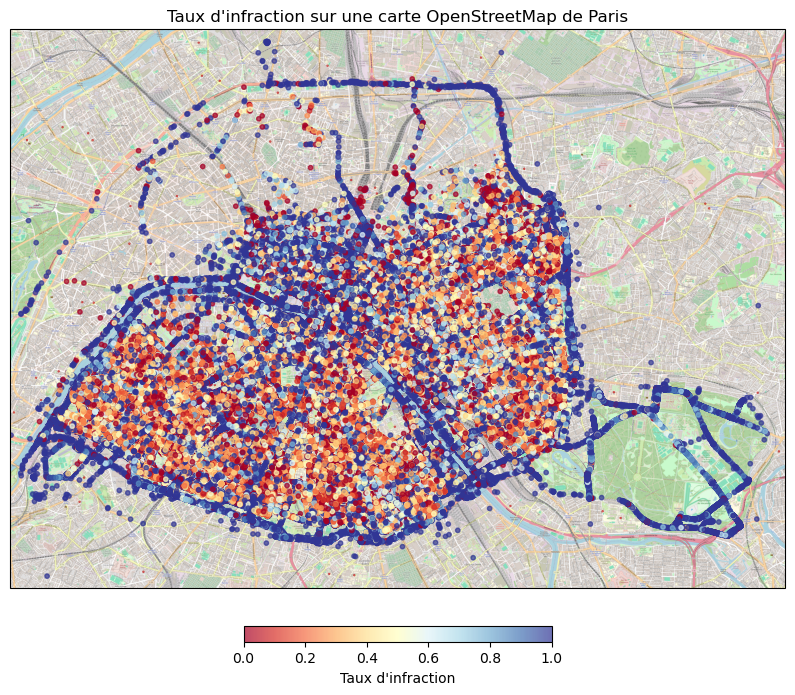

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# Valeurs minimales et maximales réelles pour Paris

lat_min, lat_max = 48.8179, 48.9007
lon_min, lon_max = 2.26755, 2.4644

# Créer une carte avec cartopy et OpenStreetMap
osm_tiles = cimgt.OSM()

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': osm_tiles.crs})
ax.set_extent([lon_min-0.01, lon_max+0.01, lat_min-0.01, lat_max+0.01], crs=ccrs.Geodetic())
ax.add_image(osm_tiles, 15)

# Définir une colormap allant du rouge (1) au bleu (0)
cmap = plt.get_cmap('RdYlBu')

# Tracer les points avec des couleurs basées sur y_train
sc = ax.scatter(x_train['longitude'], x_train['latitude'], c=y_train['invalid_ratio'], cmap=cmap, s=10, alpha=0.7, transform=ccrs.Geodetic())

# Ajouter une barre de couleur pour la légende
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, fraction=0.02)
cbar.set_label('Taux d\'infraction')

plt.title('Taux d\'infraction sur une carte OpenStreetMap de Paris')
plt.show()

C:\Users\tommy\AppData\Local\Temp\ipykernel_12060\862944904.py:47: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
C:\Users\tommy\AppData\Local\Temp\ipykernel_12060\862944904.py:47: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
C:\Users\tommy\AppData\Local\Temp\ipykernel_12060\862944904.py:47: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
C:\Users\tommy\AppData\Local\Temp\ipykernel_12060\862944904.py:47: MatplotlibDeprecationWarning: The tostring_rgb functio

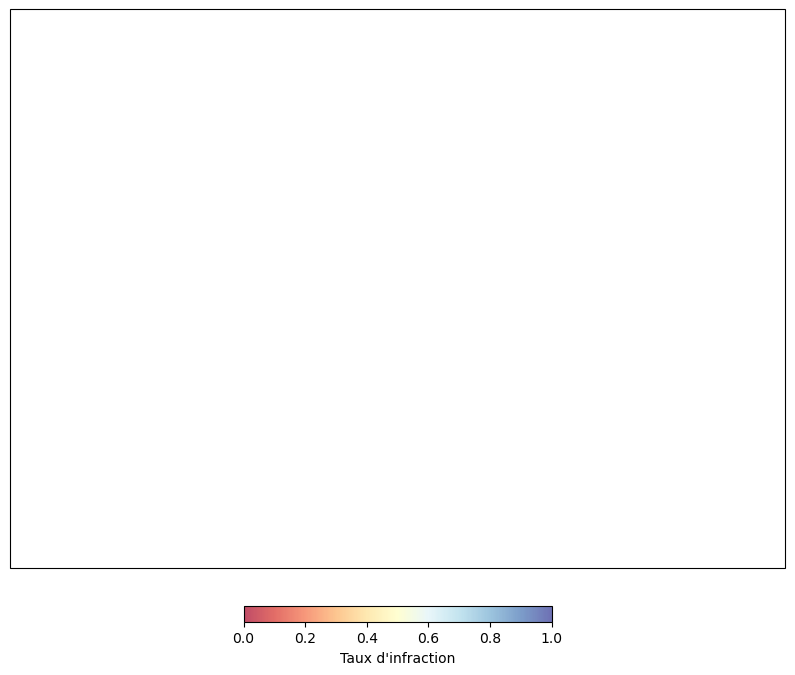

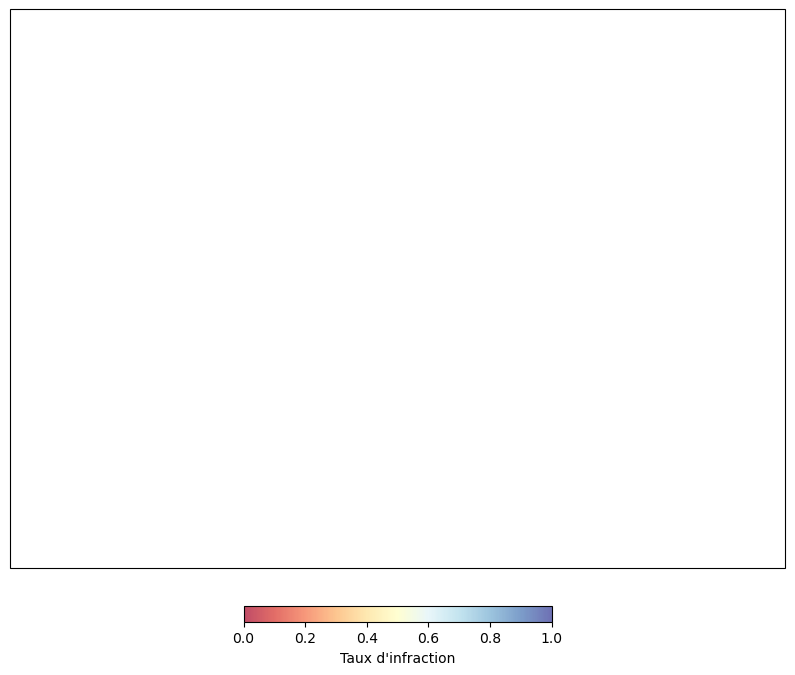

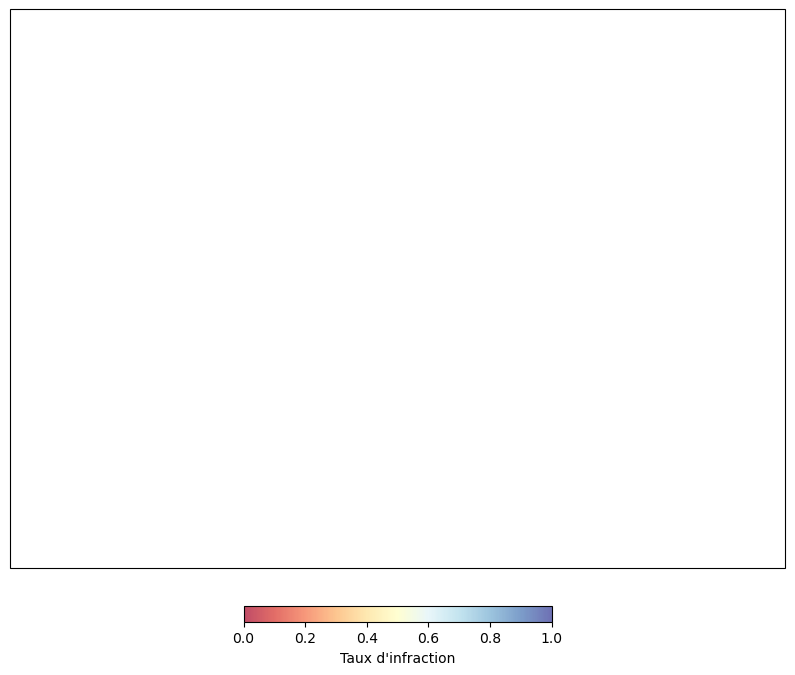

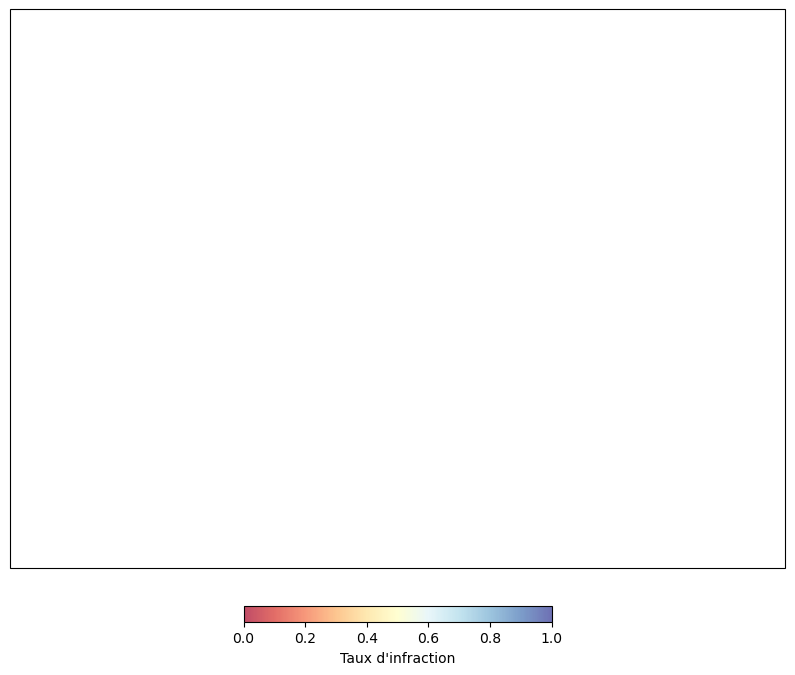

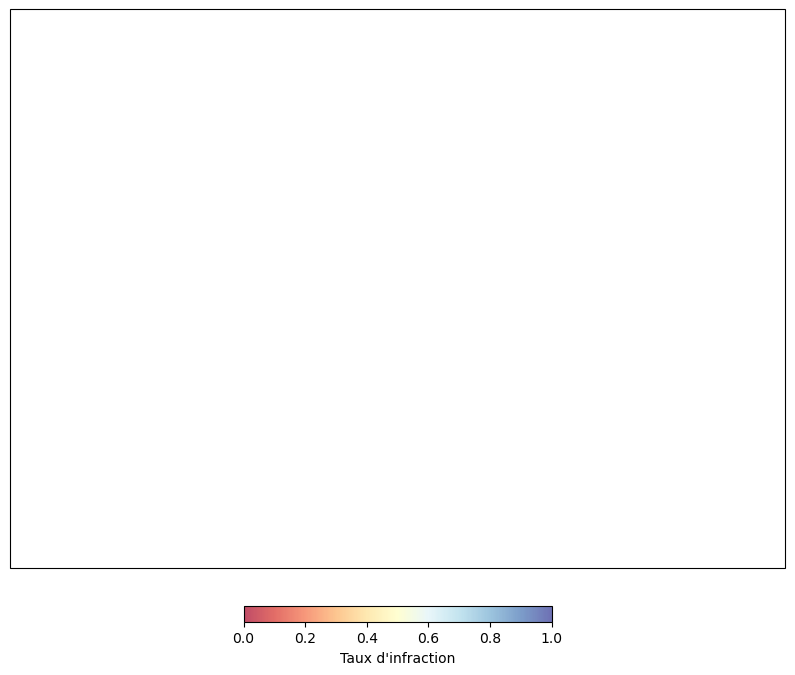

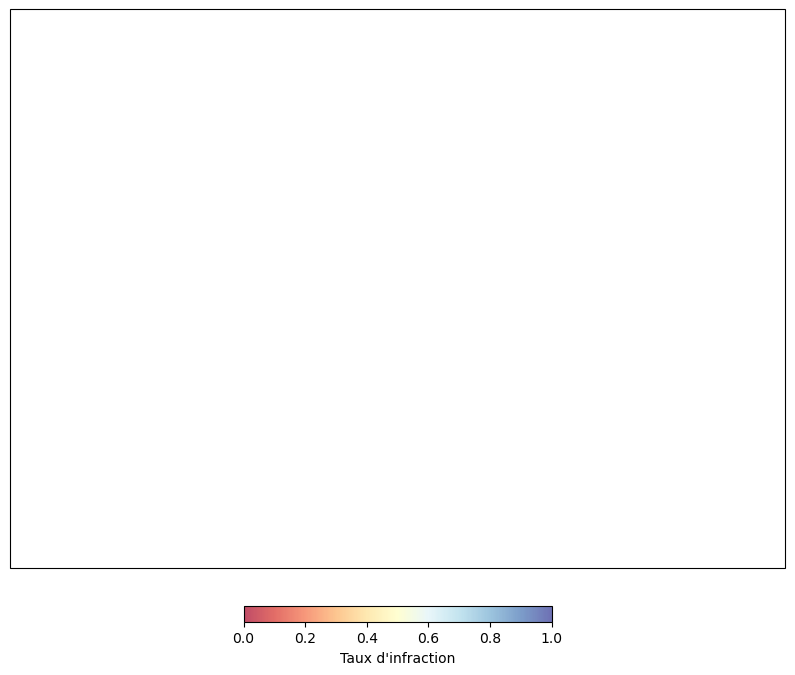

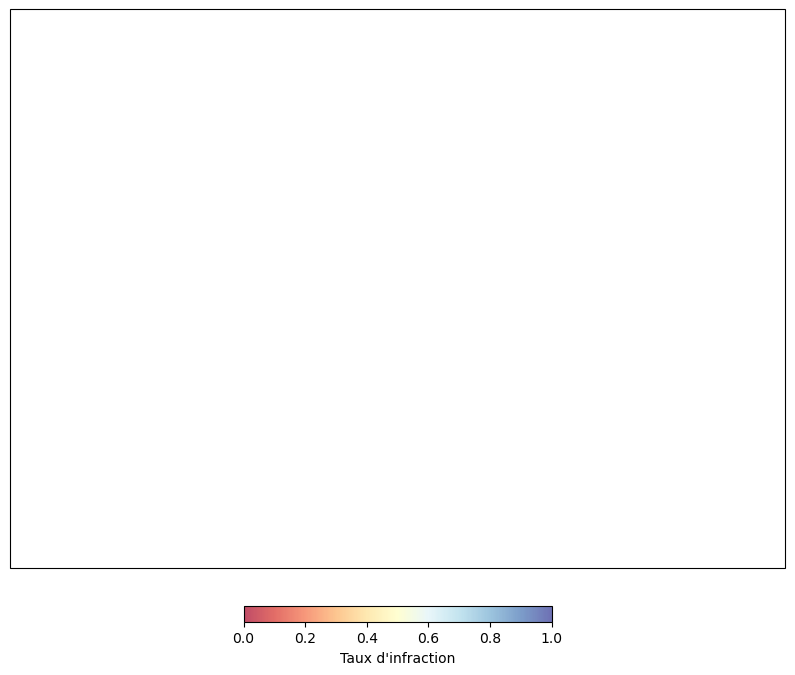

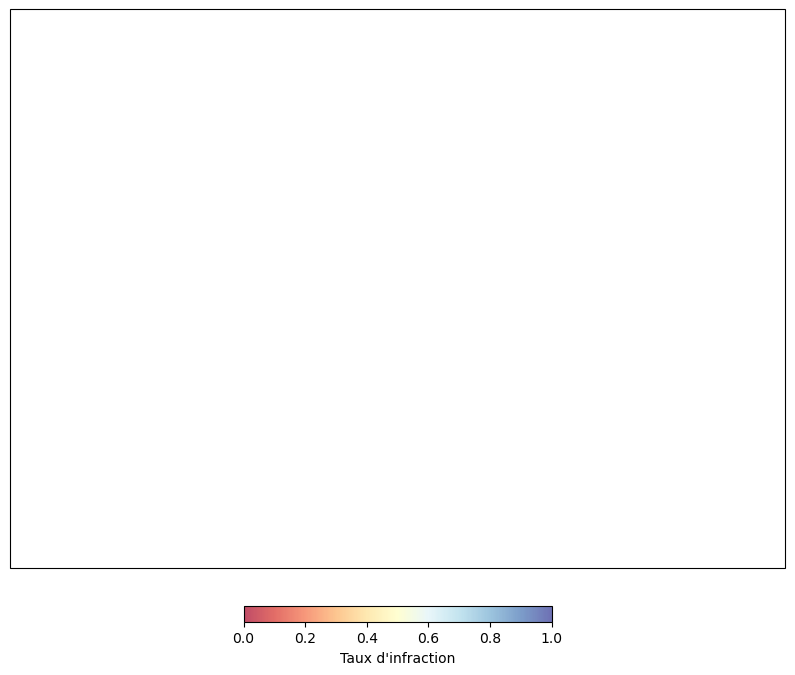

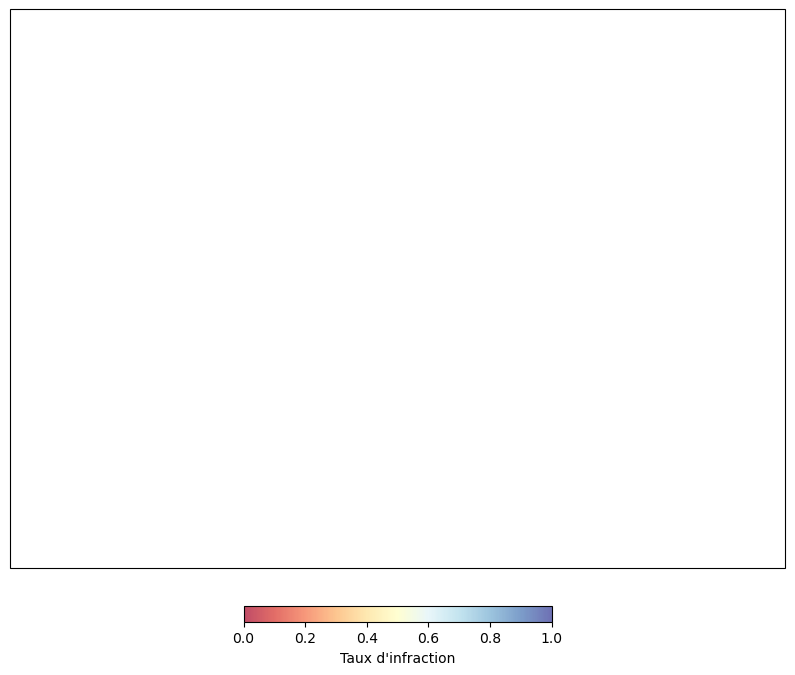

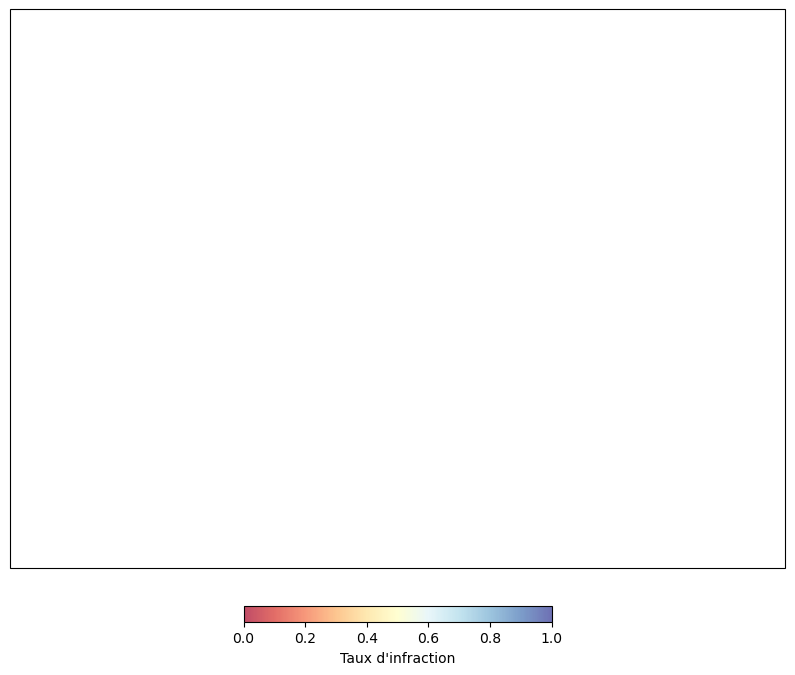

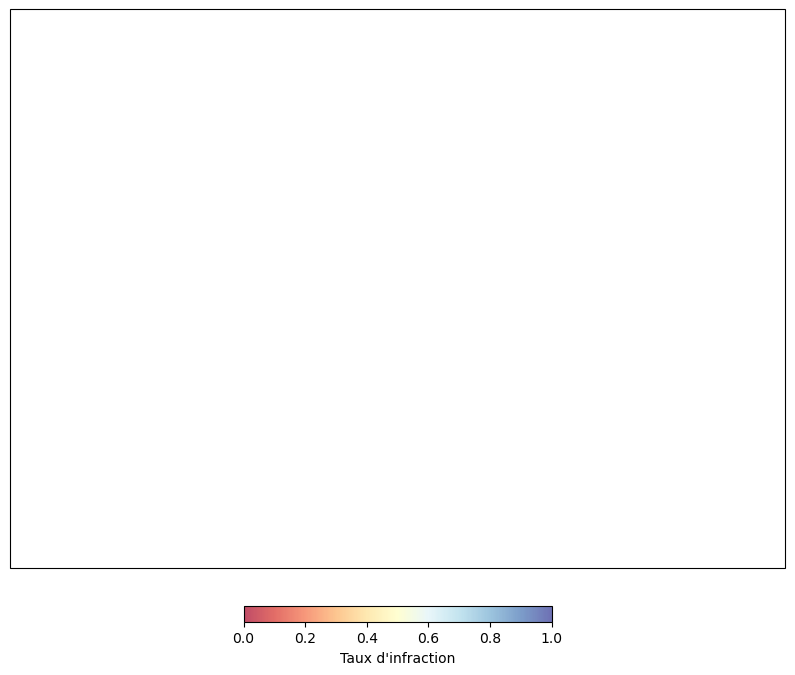

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import numpy as np
import imageio
from matplotlib.animation import PillowWriter

# Créer une carte avec cartopy et OpenStreetMap
osm_tiles = cimgt.OSM()


# Définir une colormap allant du rouge (1) au bleu (0)
cmap = plt.get_cmap('RdYlBu')

# Créer une liste pour stocker les images
images = []

# Générer une carte pour chaque mois ou heure
a = 0
for time_period in sorted(x_train['month_of_year'].unique()):
    # Filtrer les données pour le mois ou l'heure actuel(le)

    # Préparer la figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': osm_tiles.crs})
    ax.set_extent([lon_min-0.01, lon_max+0.01, lat_min-0.01, lat_max+0.01], crs=ccrs.Geodetic())
    ax.add_image(osm_tiles, 15)


    subset = x_train[x_train['month_of_year'] == time_period]
    y_subset = y_train[x_train.index.isin(subset.index)]
    osm_tiles = cimgt.OSM()
    

    # Tracer les points avec des couleurs basées sur y_train
    sc = ax.scatter(subset['longitude'], subset['latitude'], c=y_subset['invalid_ratio'], cmap=cmap, s=10, alpha=0.7, transform=ccrs.Geodetic())
    
    # Ajouter une barre de couleur pour la légende
    cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, fraction=0.02)
    cbar.set_label('Taux d\'infraction')

    # Ajouter un titre avec le mois ou l'heure
    plt.title(f'Taux d\'infraction - Mois {time_period}')

    # Sauvegarder l'image actuelle
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)

    # Effacer les points pour la prochaine itération
    ax.cla()
    ax.set_extent([lon_min-0.01, lon_max+0.01, lat_min-0.01, lat_max+0.01], crs=ccrs.Geodetic())

# Assembler les images en un GIF
imageio.mimsave('evolution_map_month.gif', images, duration=1000)  # duration est en millisecondes

plt.close(fig)

C:\Users\tommy\AppData\Local\Temp\ipykernel_12060\2537755766.py:47: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
C:\Users\tommy\AppData\Local\Temp\ipykernel_12060\2537755766.py:47: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
C:\Users\tommy\AppData\Local\Temp\ipykernel_12060\2537755766.py:47: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
C:\Users\tommy\AppData\Local\Temp\ipykernel_12060\2537755766.py:47: MatplotlibDeprecationWarning: The tostring_rgb fun

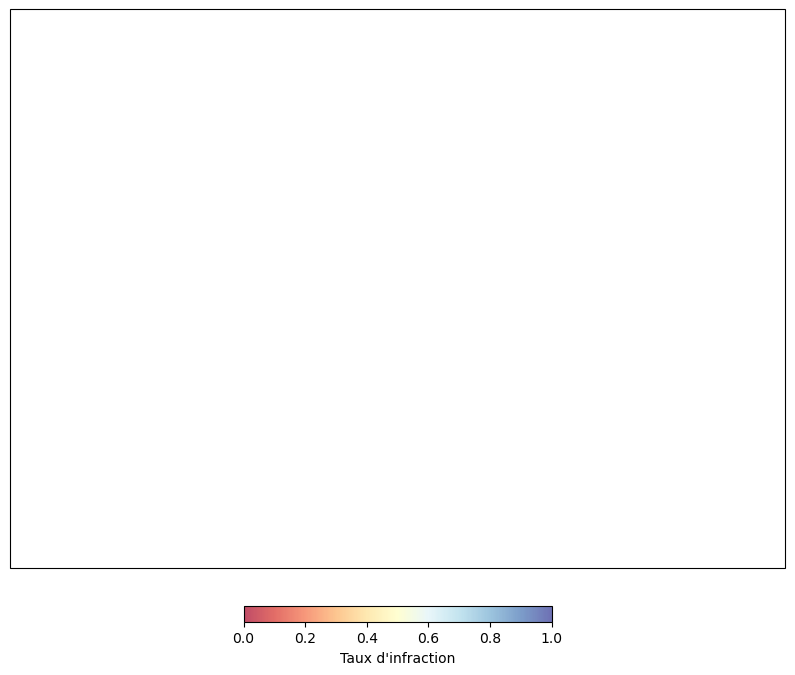

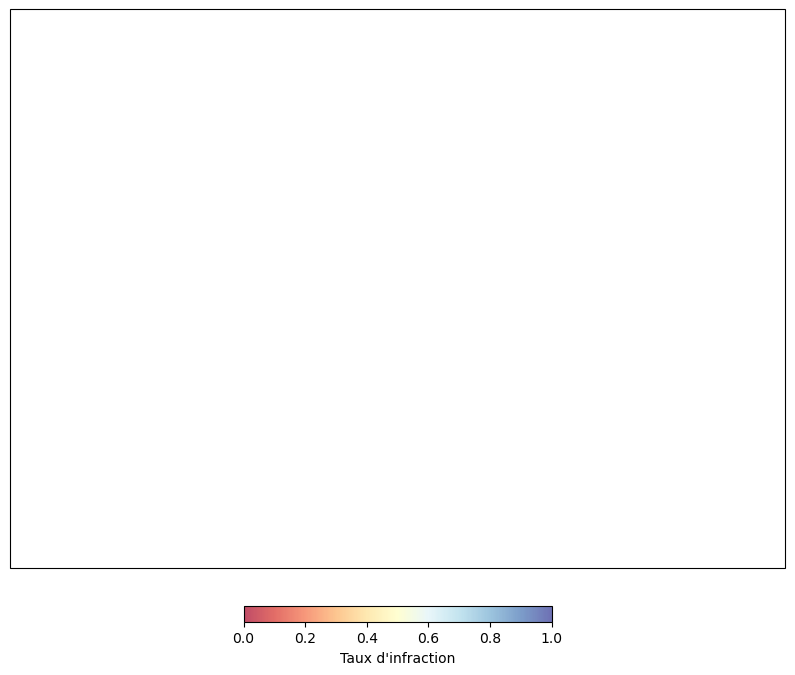

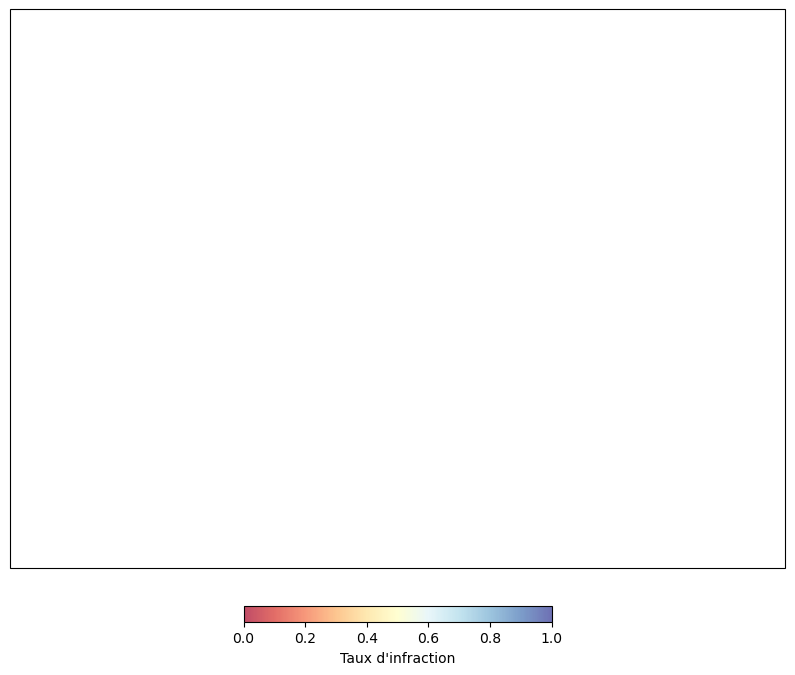

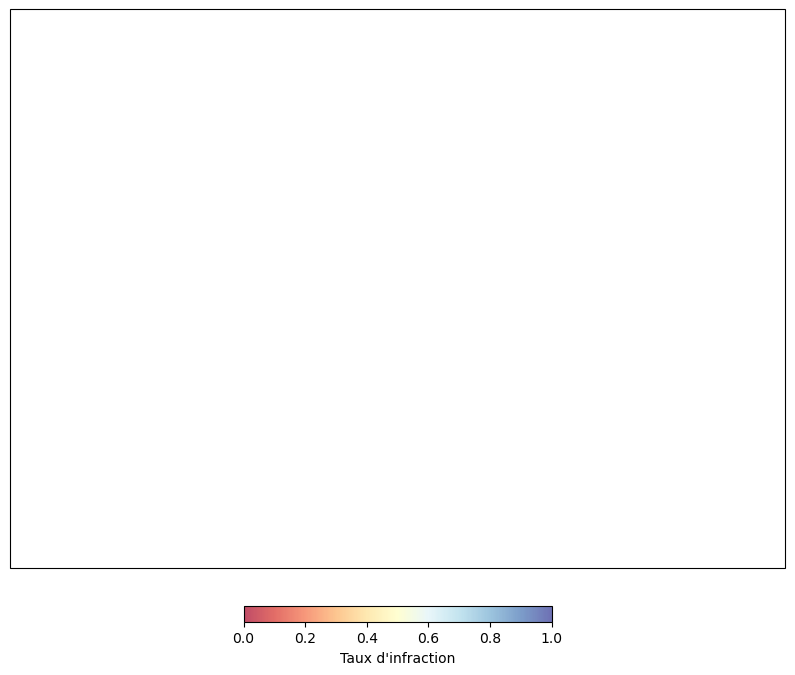

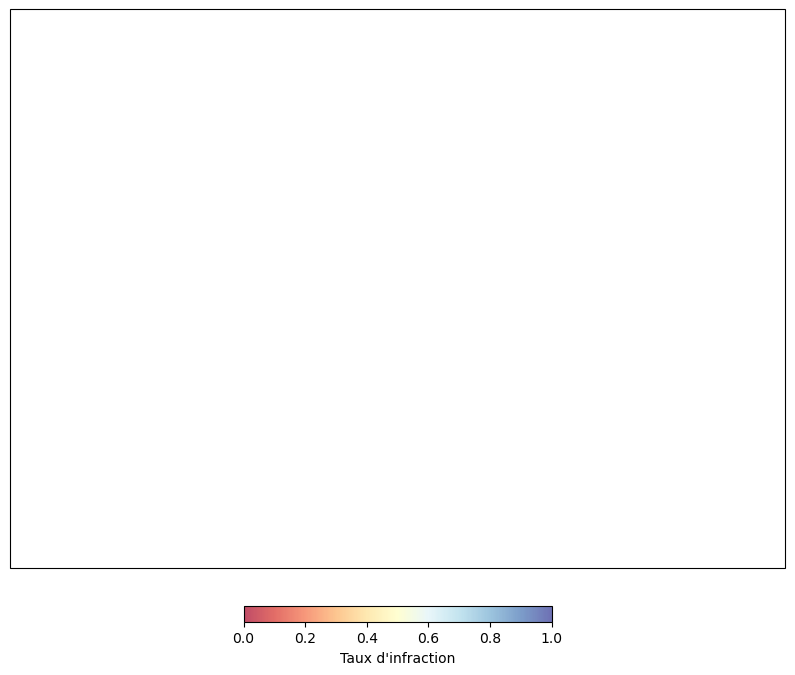

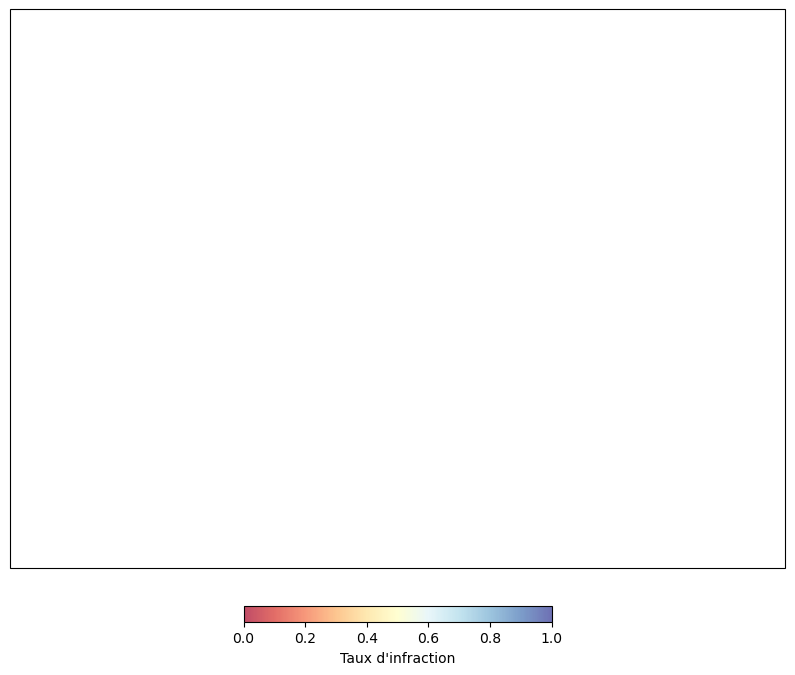

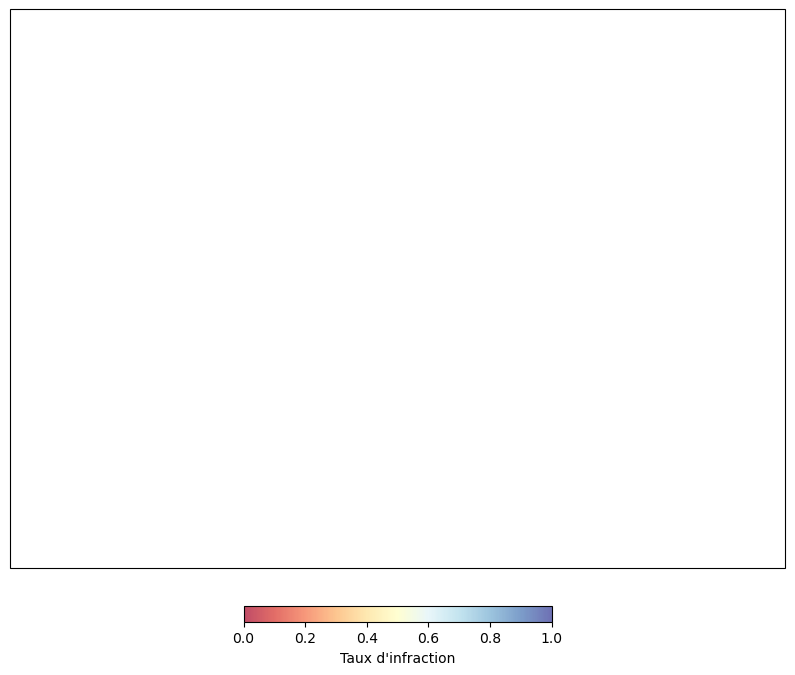

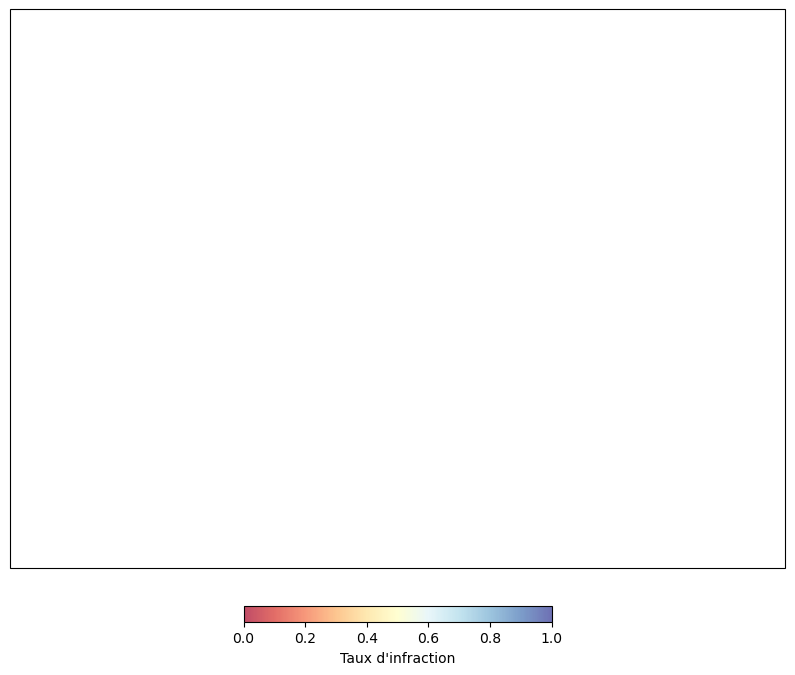

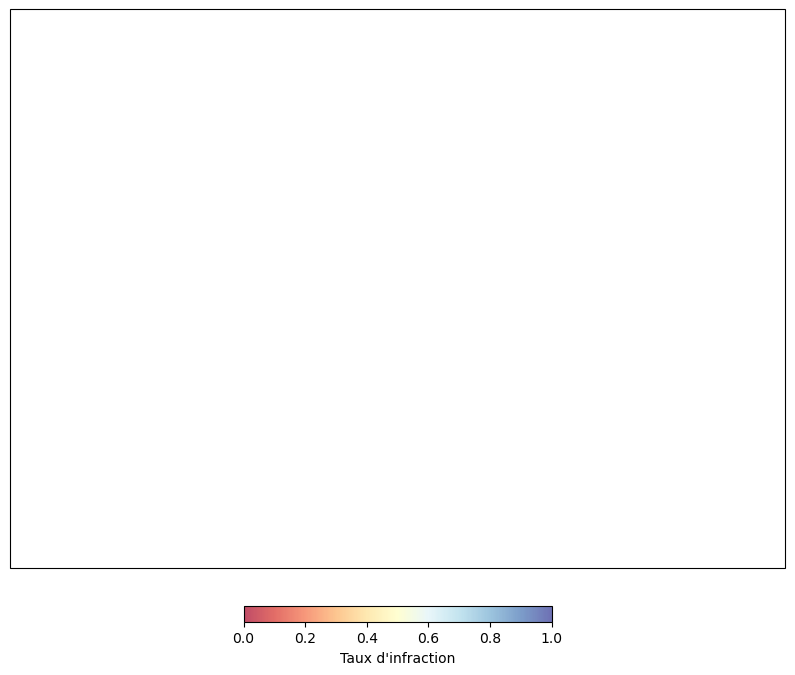

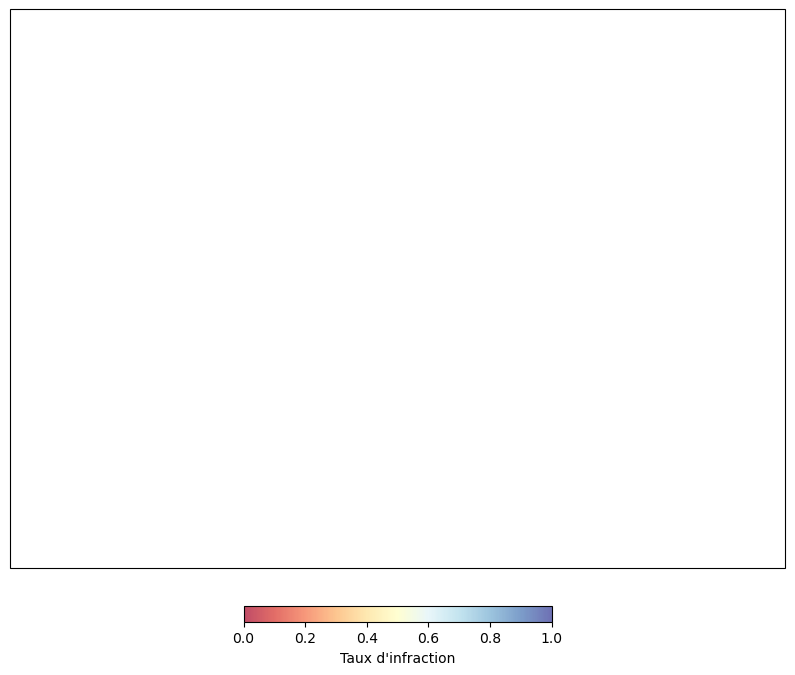

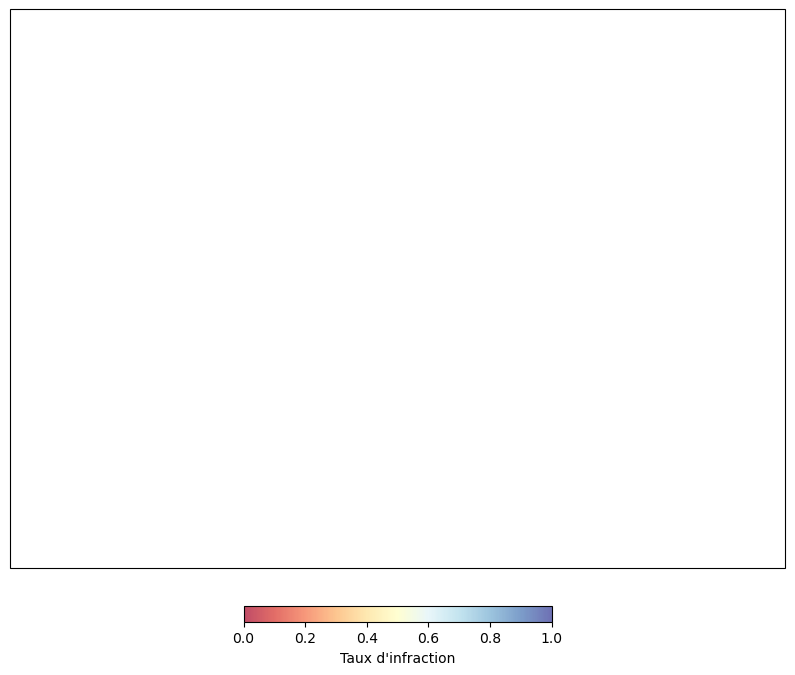

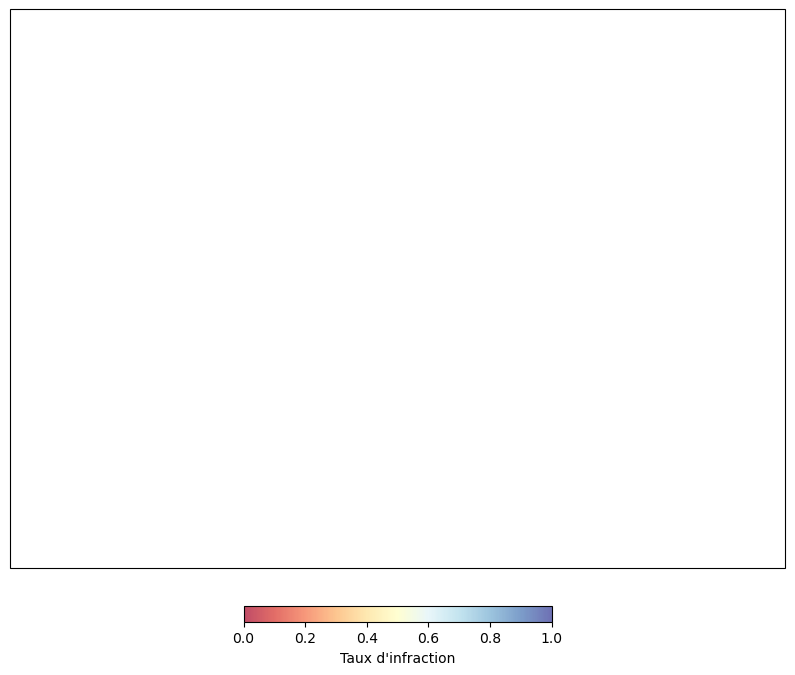

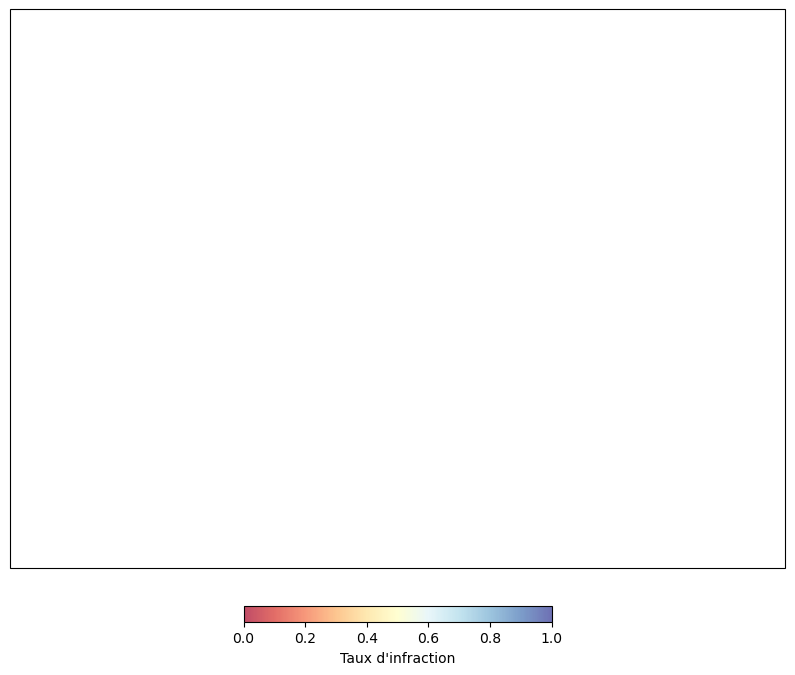

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import numpy as np
import imageio
from matplotlib.animation import PillowWriter


#difference = np.abs(y_pred - y_test)


# Créer une carte avec cartopy et OpenStreetMap
osm_tiles = cimgt.OSM()

# Définir une colormap allant du rouge (1) au bleu (0)
cmap = plt.get_cmap('RdYlBu')

# Créer une liste pour stocker les images
images = []

# Générer une carte pour chaque mois ou heure
a = 0
for time_period in sorted(x_train['hour'].unique()):
    # Filtrer les données pour le mois ou l'heure actuel(le)

    # Préparer la figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': osm_tiles.crs})
    ax.set_extent([lon_min-0.01, lon_max+0.01, lat_min-0.01, lat_max+0.01], crs=ccrs.Geodetic())
    ax.add_image(osm_tiles, 15)


    subset = x_train[x_train['hour'] == time_period]
    y_subset = y_train[x_train.index.isin(subset.index)]
    osm_tiles = cimgt.OSM()
    

    # Tracer les points avec des couleurs basées sur y_train
    sc = ax.scatter(subset['longitude'], subset['latitude'], c=y_subset['invalid_ratio'], cmap=cmap, s=10, alpha=0.7, transform=ccrs.Geodetic())
    
    # Ajouter une barre de couleur pour la légende
    cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, fraction=0.02)
    cbar.set_label('Taux d\'infraction')

    # Ajouter un titre avec le mois ou l'heure
    plt.title(f'Taux d\'infraction - Heure {time_period}')

    # Sauvegarder l'image actuelle
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)

    # Effacer les points pour la prochaine itération
    ax.cla()
    ax.set_extent([lon_min-0.01, lon_max+0.01, lat_min-0.01, lat_max+0.01], crs=ccrs.Geodetic())

# Assembler les images en un GIF
imageio.mimsave('evolution_map_hour.gif', images, duration=1000)  # duration est en millisecondes

plt.close(fig)